<a href="https://colab.research.google.com/github/ardilalukita14/PCVK-Genap-21-22/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PRAKTIKUM MINGGU KE-3**

Akses folder images pada Google Drive Anda dengan kode berikut:

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import library yang dibutuhkan.

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

### **Transformasi Linier Brightness**

 Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 50


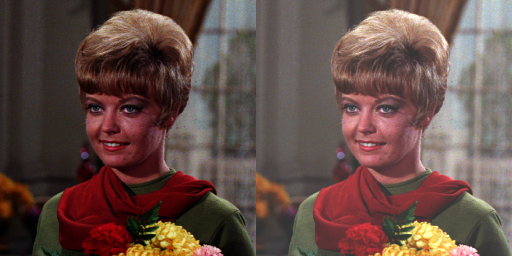

In [ ]:
print(' Mengubah tingkat kecerahan citra')
print('---------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)
    

### **TUGAS**

1.	Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

 Mengubah kontras dan tingkat kecerahan citra
---------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]: 1.5


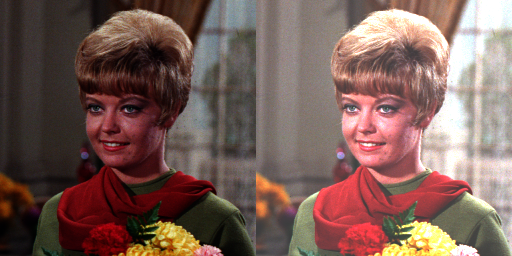

In [ ]:
print(' Mengubah kontras dan tingkat kecerahan citra')
print('---------------------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
except ValueError:
  print('Error, not a number')

try:
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/female.tiff')
brightness_contrast_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_contrast_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_contrast_image))
cv2_imshow(final_frame)
    

2.	Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

In [41]:
print(' Mengubah tingkat kecerahan citra')
print('---------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')
  
#definisikan nilai konstanta
c = 255/(np.log(1 + np.max(original)))
log_transform = c * np.log(1 + original)

#spesifikasi tipe data
log_transform = np.array(log_transform, dtype = np.uint8)

brightness_logtr = (log_transform + brightness, 0, 255)

#menampilkan gambar original dan gambar hasil modifikasi
final_frame = cv.hconcat((original, brightness_logtr))
cv2_imshow(final_frame)

 Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 40


TypeError: ignored

3.	Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

**a. Averaging**

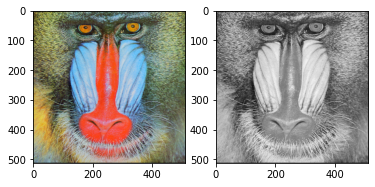

In [ ]:
#read file images dari google drive
image = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')
image2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#proses average image
grayscale_average = np.mean(image2, axis=2) #axis menunjukkan dimensi

#menampilkan gambar original dan gambar hasil modifikasi
fig, ax = plt.subplots(1,2)
ax[0].imshow(image2)
ax[1].imshow(grayscale_average, cmap='gray')

 **b.Lightness**

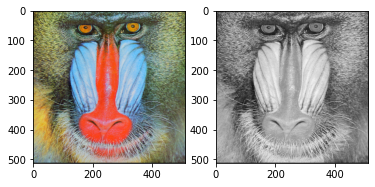

In [ ]:
#ekstrak 3 channel warna
R, G, B = image2[:,:,0], image2[:,:,1],image2[:,:,2] 

#rumus channel maksimum dan minimum
channel_maksimum = np.maximum(np.maximum(R, G), B) #np.max(image2, axis=2)
channel_minimum = np.minimum(np.minimum(R, G), B) #np.min(image2, axis=2)

#eksekusi rumus lightness
grayscale_light = ((channel_maksimum/2) + (channel_minimum/2))

#menampilkan gambar original dan gambar hasil modifikasi
fig, ax = plt.subplots(1,2)
ax[0].imshow(image2)
ax[1].imshow(grayscale_light, cmap='gray')

**c.luminance**

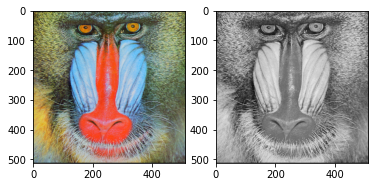

In [ ]:
#ekstrak 3 channel warna
R, G, B = image2[:,:,0], image2[:,:,1],image2[:,:,2] 

#eksekusi rumus lightness
grayscale_lumi = ((0.21 * R) + (0.72 * G) + (0.07 * B))

#menampilkan gambar original dan gambar hasil modifikasi
fig, ax = plt.subplots(1,2)
ax[0].imshow(image2)
ax[1].imshow(grayscale_lumi, cmap='gray')

4.	Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna merah pada citra masukan dan ubah bagian lain yang tidak berwarna merah menjadi grayscale seperti pada contoh berikut:

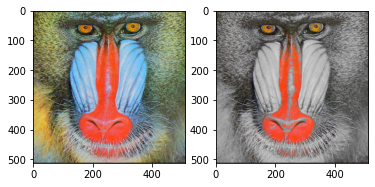

In [ ]:
#merubah color image menjadi RGB
image3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#proses menampilkan gambar yang hanya berwarna merah
for height in range(R.shape[0]):
  for width in range(R.shape[1]):
    if(image2[height,width,0]<235 and image2[height,width,1]>75 and image2[height,width,2]>20):
      image3[height,width] = np.mean(image2[height,width])

#menampilkan gambar original dan gambar hasil modifikasi
fig, ax = plt.subplots(1,2)
ax[0].imshow(image2)
ax[1].imshow(image3)

-----------------------------------------------------------------------
### **FINISH**
-----------------------------------------------------------------------